# Efficient Frontier N-Assets

In [1]:
%load_ext autoreload
%autoreload 2
import stark

In [2]:
industry_returns =  stark.get_ind_returns()
annualized_ind_ret = stark.calculate_annualize_rets(
    industry_returns.loc["1996":"2000"],
    periods_per_year=12
)
cov = industry_returns.loc["1996":"2000"].cov()


```python 


def plot_ef(n_points, returns_data, cov_matrix):
    """
    Plots the N-assets efficient frontier
    """
    if returns_data.shape[0] != 2 or returns_data.shape[0] != 2:
        raise ValueError("plot_ef2 can only plot 2 asset frontiers")
        
    # iterate to obtain weights depending on n_points input variable    
    weights = minimize_vol(target_return)???

    # calculate returns for every weight
    returns = [
        calculate_portfolio_return(
            w, 
            returns_data
        ) for w in weights
    ]
    
    # calculate volatility for every weight
    volatility = [
            calculate_portfolio_vol(
                w, 
                cov_matrix
            ) for w in weights
    ]

    # construct dataframe for efficient frontier
    efficient_frontier_df = pd.DataFrame(
        {
            "returns": returns,
            "volatility": volatility
        }
    )

    return efficient_frontier_df.plot.line(
        x = "volatility",
        y = "returns", 
        style = ".-"
    )

```

In [3]:
from scipy.optimize import minimize

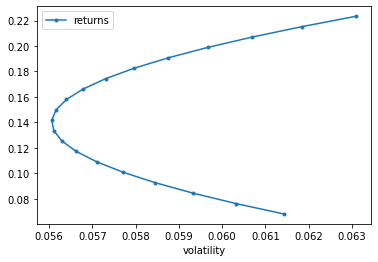

In [5]:
assets_list = ["games", "fin"] 
stark.plot_ef2(
    n_points = 20, 
    returns_data = annualized_ind_ret[assets_list],
    cov_matrix = cov.loc[assets_list, assets_list]
);

In [36]:
w15 = stark.minimize_vol(
    0.15, 
    annualized_ind_ret[assets_list],
    cov.loc[assets_list, assets_list]
)
vol15 = stark.calculate_portfolio_vol(w15, cov.loc[assets_list, assets_list])
vol15

0.056163669406706564

<AxesSubplot:xlabel='volatility'>

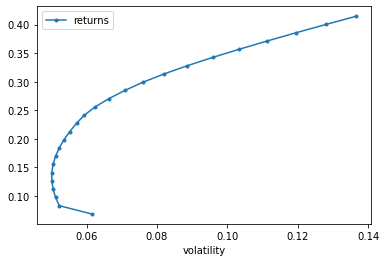

In [43]:
assets_list = ["smoke", "fin", "games", "coal"]
stark.plot_ef(25, annualized_ind_ret[assets_list], cov.loc[assets_list, assets_list])